# Homework 2: Discovery of Frequent Itemsets and Association Rules

Date: 22/11/2021

Authors: Alessandro Sanvito and Thuany Karoline Stuart

# Solution

The code in the src/ folder reproduces the algorithm described in "R. Agrawal and R. Srikant.
 [Fast Algorithms for Mining Association Rules (Links to an external site.)](http://www.vldb.org/conf/1994/P487.PDF),
 VLDB '94".

The code leverages Python's higher-order functions map() and filter() for fast iteration and Itertools for generating
the itemsets to achieve the best performance.

An element of particular interest in the implementation is the way the support is counted.
At first, the a priori algorithm implemented the count of the candidate frequent itemsets in every transaction
by iterating in a double loop. This approach proved to be inefficient and led to unmanageable execution time.
The current solution, on the other hand, considers once each basket. For each basket, it generates all the itemsets
of the considered length. Then, for each item set, it checks in O(1) if it is a candidate and in case it proceeds to
increase the support.

Overall, the implementation achieves considerable performance on the large given dataset, in the spirit of the original algorithm.

# How to Run

To run the conducted experiments, follow the steps:

1. Unzip the file containing the homework.
1. Ensure to have Python 3 installed on your machine.
1. Ensure that NumPy, Typing, Itertools and Jupyter Notebook are installed in your environment.
1. Download the "T10I4D100K.dat" dataset file from the [link](https://canvas.kth.se/courses/28712/files/4741618/download?wrap=1).
1. Move the dataset file to the folder ./data
1. Start Jupyter Notebook.
1. In Jupyter Notebook, open the notebook "Discovery of Frequent Itemsets and Association Rules" in the folder /src of the homework.
1. Press "run all".

# Experiments

To test the A-Priori algorithm for finding frequent itemsets and generating association rules, we run experiments on a dataset of sales transactions (T10I4D100K). The dataset contains 100,000 baskets summing up to 1,010,228 items, with a market size of 870 different items.

## Set up

Firstly, we set up the experiments by importing the required libraries and defining the path to the dataset file.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

from a_priori import *
from rule_generation import *

sns.set_style('whitegrid')

C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.2V74HQ3MKNZHDCKJELIPPY7V6QMK3UOZ.gfortran-win32.dll
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.U35RT5X5BPDSH5ZTF276YADQR2KDU6PR.gfortran-win32.dll
  stacklevel=1)


### Define Path

In [2]:
path = os.path.dirname(os.getcwd())
data_path = os.path.join(path, 'data', 'T10I4D100K.dat')
data_path

'C:\\Users\\thuan\\Documents\\Projects\\KTH\\ID2222-Data-Mining-Sanvito-Stuart\\lab2\\data\\T10I4D100K.dat'

## Frequent Itemsets

We run the algorithm to find frequent itemsets on the dataset with a support threshold of 1000. We have chosen this threshold arbitrarily by trial an error such that there were a significant number of itemsets to be found, based on the fact that the average support of singletons is 1161.18. 

By setting verbose to `true`, we can observe the steps taken by the algorithm to find the itemsets, such as how many itemsets were found and how many candidates were generated at each step. For this case, the algorithm has found 385 frequent items, of which 375 are singletons. The return value, `freq_items`, holds a dictionary with the itemset as key and the support as value.

In [3]:
freq_items = find_frequent_item_sets(file=data_path, s=1000, verbose=True)

The market contains 870 different items.
The average support is 1161.18
The most frequent singletons have been calculated. 375 singletons was/were found.
Computing frequent itemsets of length 2...
70125 candidates generated!
Done! 9 frequent items was/were found.
Computing frequent itemsets of length 3...
4 candidates generated!
Done! 1 frequent items was/were found.

In total 385 frequent items were found.


Now, we vary the support threshold to verify how it affects the execution time and the number of frequent itemsets found.

In [4]:
supports = [500, 750, 1000, 1250, 1500]
durations = []
n_freq_items = []

for s in supports:
  start = time.time()
  freq_items = find_frequent_item_sets(file=data_path, s=s, verbose=False)
  duration = time.time() - start
  
  durations.append(duration)
  n_freq_items.append(len(freq_items))

We observe that even though the size of the dataset is the same, the execution time decreases with the increase in the support threshold given that more candidates are generated and more itemsets have to be checked.

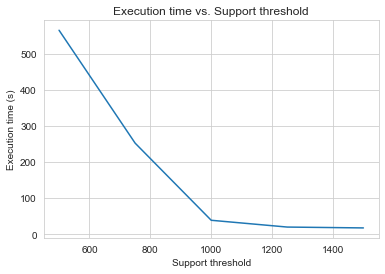

In [5]:
plt.plot(supports, durations)
plt.xlabel('Support threshold')
plt.ylabel('Execution time (s)')
plt.title('Execution time vs. Support threshold')
plt.show()

When we look at the number of frequent itemsets, we observe that indeed the execution time depends on the number of itemsets to be found, which in turn depend on the support threshold.

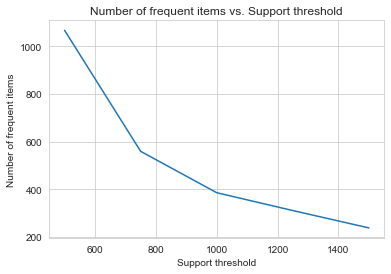

In [6]:
plt.plot(supports, n_freq_items)
plt.xlabel('Support threshold')
plt.ylabel('Number of frequent items')
plt.title('Number of frequent items vs. Support threshold')
plt.show()

## Association Rules

To generate association rules we need a set of frequent itemsets. Therefore, we run again the algorithm to find the frequent itemsets with a support threshold of 1000.

In [7]:
freq_items = find_frequent_item_sets(file=data_path, s=1000, verbose=True);

The market contains 870 different items.
The average support is 1161.18
The most frequent singletons have been calculated. 375 singletons was/were found.
Computing frequent itemsets of length 2...
70125 candidates generated!
Done! 9 frequent items was/were found.
Computing frequent itemsets of length 3...
4 candidates generated!
Done! 1 frequent items was/were found.

In total 385 frequent items were found.


We decide to vary the confidence threshold and analyze how it affects the execution time and the number of rules generated.

In [8]:
confidences = [0.1, 0.3, 0.5, 0.7, 0.9]
durations = []
n_rules = []

for c in confidences:
  start = time.time()
  rules = generate_rules(frequent_item_sets=freq_items, c=c)
  duration = time.time() - start
  
  durations.append(duration)
  n_rules.append(len(rules))

We observe that the execution time of this task is minimal and independent of the number of rules. There is a small variance in that is most likely because of the parallel execution of other tasks.

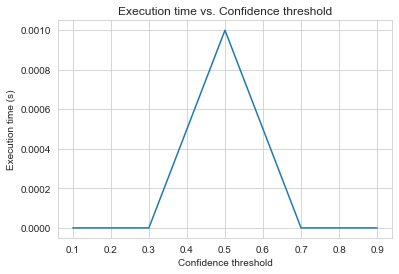

In [9]:
plt.plot(confidences, durations)
plt.xlabel('Confidence threshold')
plt.ylabel('Execution time (s)')
plt.title('Execution time vs. Confidence threshold')
plt.show()

Finally, when we look at the number of rules generated, as expected, they decrease with the increase of the confidence threshold as less associations are as strong as required.

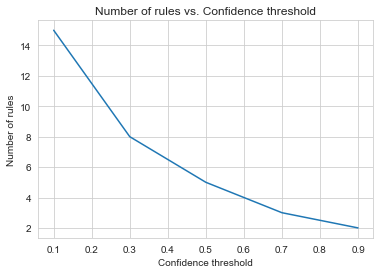

In [10]:
plt.plot(confidences, n_rules)
plt.xlabel('Confidence threshold')
plt.ylabel('Number of rules')
plt.title('Number of rules vs. Confidence threshold')
plt.show()